# Exploratory Data Analysis (EDA) and Data Preparation

Dataset: 
* Loan Status Data for Credit Scoring: <a href="https://www.kaggle.com/nikniko101v/loans-train">Loans Data</a>  
* Filename: loans_train.csv
* Target: Loan_Status

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0) 

%matplotlib inline

In [2]:
# Set Options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [3]:
df = pd.read_csv('../Datasets/loans_train.csv', index_col = ['Loan_ID'], parse_dates=True)

## Describe the Data

In [4]:
df.shape

(614, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


In [7]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Female,No,0,Graduate,No,2900,0.00,71.00,360.00,1.00,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.00,40.00,180.00,1.00,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.00,253.00,360.00,1.00,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.00,187.00,360.00,1.00,Urban,Y
LP002990,Female,No,0,Graduate,Yes,4583,0.00,133.00,360.00,0.00,Semiurban,N


In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

________

## Verify Data Quality

Look out for the following:
* Unexpected Missing Values
* Incorrect or unexpected data type & format (ALL)
* Duplicates (ALL)
* Unexpected dimensions (i.e. missing rows or columns) (ALL)
* Incorrect Spelling (CAT)
* Mixed cases for strings (CAT)
* Unexpected outliers or anomalous values (NUM)
* Inconsistent or incorrect units of measurement (NUM)

#### Check for unexpected missing values

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
total

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dropna(axis=0, how='any', inplace=True)

In [11]:
df.shape

(480, 12)

#### Check for Incorrect or unexpected data type & format

In [12]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [14]:
df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

#### Check for duplicates 

In [15]:
# df.duplicated()
df.duplicated().sum()

0

#### Data Preparation - Handle Duplicates

In [16]:
df.duplicated().value_counts()

False    480
dtype: int64

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().value_counts()

False    480
dtype: int64

Note: seems no problem for duplicated record

### Check Categorical Column Values

In [19]:
#Categorical Features Only
df_cat = df.select_dtypes(include=['object'])

#Numerical Features Only
df_num = df.select_dtypes(include=['int64','float64'])

#### Check for misspellings and mixed cases for Categorical Data 

In [20]:
#Describe the Categorical Features. Check if Number of Unique Values is as expected.
df.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,480,480,480,480,480,480,480
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,394,311,274,383,414,191,332


In [21]:
#Other Methods to Check: Value Counts
df.Property_Area.value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [22]:
#Other Methods to Check: Unique
df.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [23]:
df.Married.nunique()

2

In [24]:
#Other Methods to Check: Number of Unique
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

### Visualize & Analyze Univariate Numeric Variables

<AxesSubplot:>

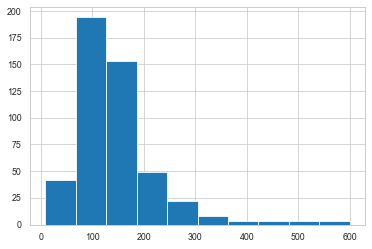

In [25]:
# Plot histograms, distplots, box plots, and/or density plots
# All features can be plotted on a histogram
df.LoanAmount.hist()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

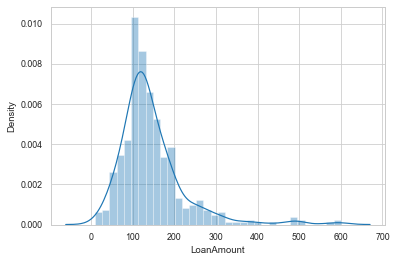

In [26]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

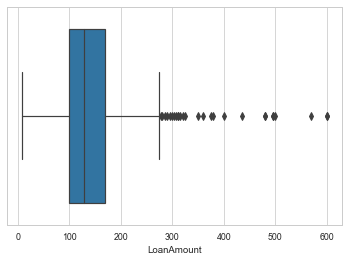

In [27]:
sns.boxplot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

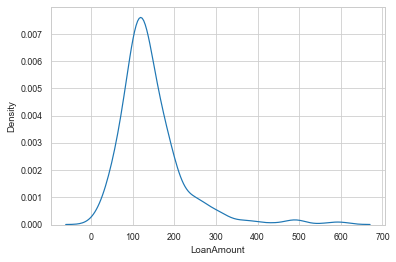

In [28]:
sns.kdeplot(df.LoanAmount)

#### Data Preparation -  Handle unexpected outliers

In [29]:
#Can remove outliers using the IQR method where any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier

def remove_Outliers(df,col_name):
    print("Orig DF Size:"+ str(df.shape) )
    Q1 = np.quantile(df[col_name],0.25)

    Q3 = np.quantile(df[col_name],0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)

    print("Lower Limit: %.2f" % lower_limit)
    print("Upper Limit: %.2f" % upper_limit)
    
    df_new = df[(df[col_name] > lower_limit) & (df[col_name] < upper_limit)]
    print("New DF Size:"+ str(df_new.shape) )
    return df_new


In [30]:
df2 = remove_Outliers(df, 'LoanAmount')

Orig DF Size:(480, 12)
Lower Limit: -5.00
Upper Limit: 275.00
New DF Size:(450, 12)


<AxesSubplot:>

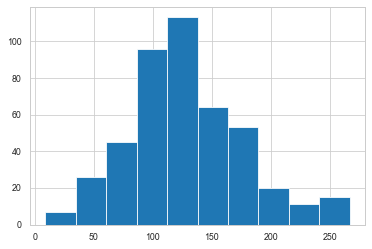

In [31]:
df2.LoanAmount.hist()

### Visualize & Analyze Univariate Categorical Variables

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

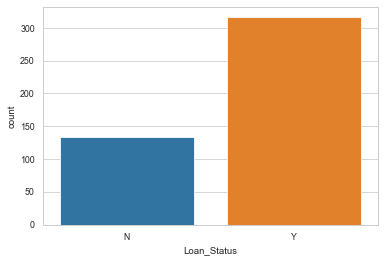

In [32]:
#Plot barplots, countplots
sns.countplot(data = df2, x='Loan_Status')

### Run Multivariate analysis and plots


In [33]:
# Check correlation by computing and plotting correlation matrix
#df.corr()
df2.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.15,0.34,-0.01,0.04
CoapplicantIncome,-0.15,1.00,0.17,-0.00,-0.00
LoanAmount,0.34,0.17,1.00,0.08,-0.02
Loan_Amount_Term,-0.01,-0.00,0.08,1.00,0.02
Credit_History,0.04,-0.00,-0.02,0.02,1.00


<AxesSubplot:>

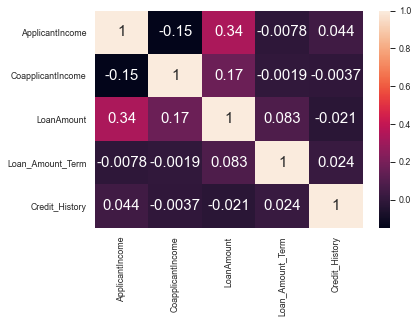

In [34]:
#sns.heatmap(df.corr(), annot=True)
sns.heatmap(df2.corr(), annot=True, annot_kws={'size': 15})

#### Plot Quantitative vs. Quantitative values together, any observations/insights?

There seems to be a significant correlation with the following features:
- between `LoanAmount` and `Loan_Amount_Term`
- dataset also shows to follow the shape of normal distribution

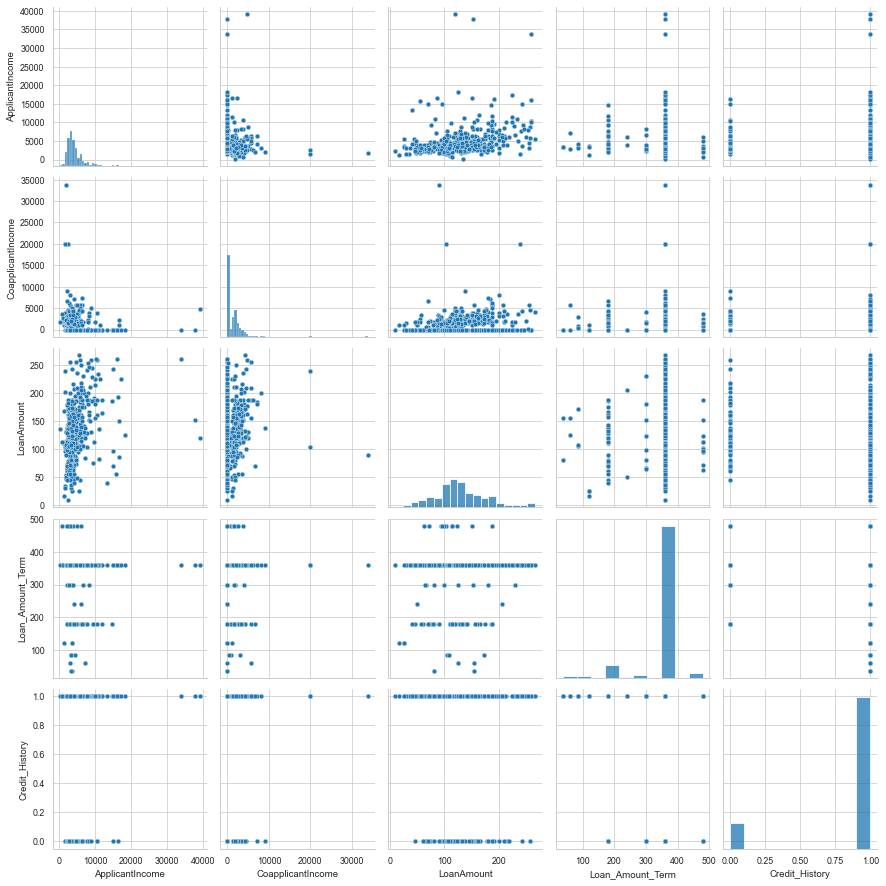

In [35]:
# Plot scatterplots, jointplots, regplots, and pairplots if needed
sns.pairplot(df2)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

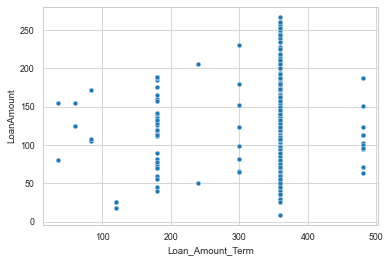

In [36]:
sns.scatterplot(x='Loan_Amount_Term', y='LoanAmount', data = df2)

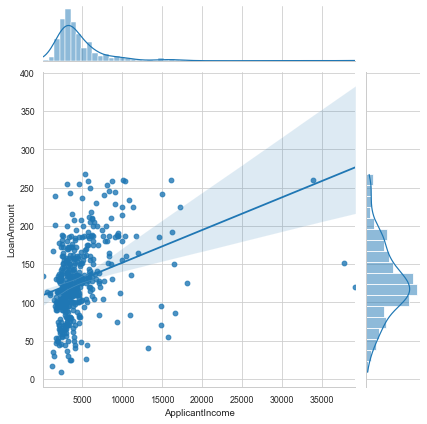

In [37]:
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=df2, kind='reg')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

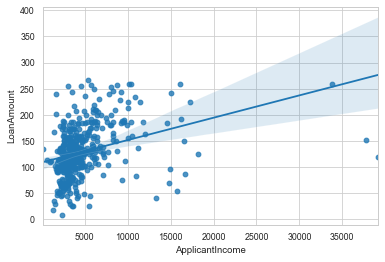

In [38]:
sns.regplot(x='ApplicantIncome', y='LoanAmount', data = df2)

#### Plot Qualitative vs. Quantitative values together, any observations/insights?

<AxesSubplot:>

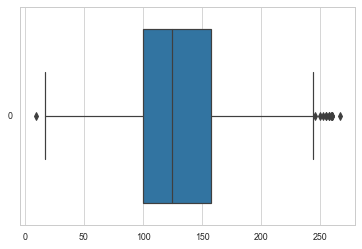

In [39]:
#Plot boxplots, violin plots, catplots
sns.boxplot(data = df2['LoanAmount'], orient='h')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

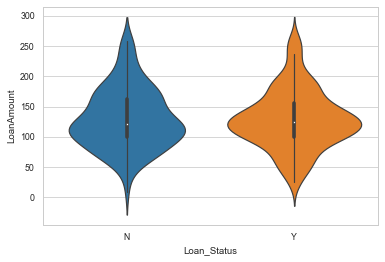

In [40]:
sns.violinplot(data=df2,x="Loan_Status", y="LoanAmount")

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

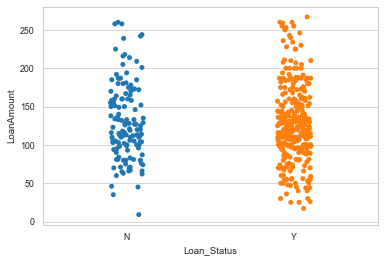

In [41]:
sns.stripplot(data=df2, x="Loan_Status", y="LoanAmount")

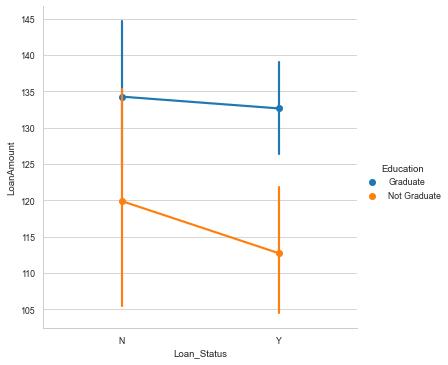

In [42]:
sns.catplot(data=df2,x="Loan_Status", y="LoanAmount", hue = "Education", kind="point")

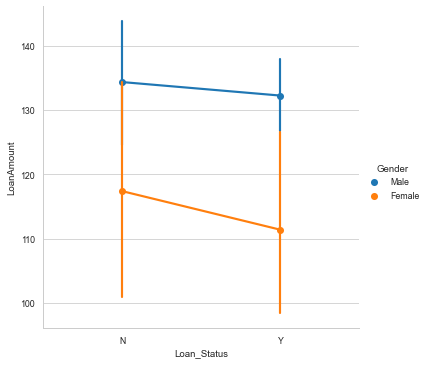

In [43]:
sns.catplot(data=df2,x="Loan_Status", y="LoanAmount", hue = "Gender", kind="point")

### Data Preparation - Category to Numeric

In [44]:
df2.describe(include=['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,450,450,450,450,450,450,450
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,368,287,264,354,390,181,316


In [45]:
df2.Dependents.head(10)

Loan_ID
LP001003     1
LP001005     0
LP001006     0
LP001008     0
LP001011     2
LP001013     0
LP001014    3+
LP001018     2
LP001024     2
LP001028     2
Name: Dependents, dtype: object

#### Convert any ordinal features to numeric 

In [46]:
# Use OrdinalEncoder or substitution
df2['Dependents_ord'] = df2['Dependents']
df2 = df2.replace({'Dependents_ord':{'0':0,'1':1,'2':2,'3+':3}})
df2.Dependents_ord.value_counts()

0    264
2     81
1     71
3     34
Name: Dependents_ord, dtype: int64

In [47]:
df2.Dependents.value_counts()

0     264
2      81
1      71
3+     34
Name: Dependents, dtype: int64

In [48]:
df2.drop(['Dependents'], axis=1, inplace=True)

In [49]:
df2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_ord
Loan_ID,,,,,,,,,,,,
LP001003,Male,Yes,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N,1
LP001005,Male,Yes,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y,0
LP001006,Male,Yes,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y,0
LP001008,Male,No,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y,0
LP001011,Male,Yes,Graduate,Yes,5417,4196.00,267.00,360.00,1.00,Urban,Y,2


In [50]:
df2.dtypes

Gender                object
Married               object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Dependents_ord         int64
dtype: object

#### Convert nominal features to numeric

In [51]:
# use pd.get_dummies, make sure to join with original dataset and/or drop columns not needed
df_cat = df2.select_dtypes(include='object')
df_cat.drop('Loan_Status', axis=1, inplace=True)
df_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
Loan_ID,,,,,
LP001003,Male,Yes,Graduate,No,Rural
LP001005,Male,Yes,Graduate,Yes,Urban
LP001006,Male,Yes,Not Graduate,No,Urban
LP001008,Male,No,Graduate,No,Urban
LP001011,Male,Yes,Graduate,Yes,Urban


In [52]:
df_cat_dummies = pd.get_dummies(df_cat)

In [53]:
df_cat_dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,
LP001003,0,1,0,1,1,0,1,0,1,0,0
LP001005,0,1,0,1,1,0,0,1,0,0,1
LP001006,0,1,0,1,0,1,1,0,0,0,1
LP001008,0,1,1,0,1,0,1,0,0,0,1
LP001011,0,1,0,1,1,0,0,1,0,0,1


In [54]:
df2 = df2.join(df_cat_dummies)

df2.drop(df_cat.columns, axis=1, inplace=True)

In [55]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_ord,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,,
LP001003,4583,1508.00,128.00,360.00,1.00,N,1,0,1,0,1,1,0,1,0,1,0,0
LP001005,3000,0.00,66.00,360.00,1.00,Y,0,0,1,0,1,1,0,0,1,0,0,1
LP001006,2583,2358.00,120.00,360.00,1.00,Y,0,0,1,0,1,0,1,1,0,0,0,1
LP001008,6000,0.00,141.00,360.00,1.00,Y,0,0,1,1,0,1,0,1,0,0,0,1
LP001011,5417,4196.00,267.00,360.00,1.00,Y,2,0,1,0,1,1,0,0,1,0,0,1


### Scale the numeric columns excluding the target values

In [56]:
# Separate the target variable(s)
df2_x = df2.drop('Loan_Status', axis=1)
df2_y = df2.Loan_Status

In [57]:
# Perform scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()

In [60]:
scaler.fit(df2_x)

MinMaxScaler()

In [61]:
scaled_data = scaler.transform(df2_x)

In [62]:
# new DataFrame
df_minmax = pd.DataFrame(scaled_data, columns=df2_x.columns, index=df2_x.index)

In [63]:
df_minmax.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_ord,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,,,,
LP001003,0.11,0.04,0.46,0.73,1.00,0.33,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
LP001005,0.07,0.00,0.22,0.73,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
LP001006,0.06,0.07,0.43,0.73,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00
LP001008,0.15,0.00,0.51,0.73,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
LP001011,0.14,0.12,1.00,0.73,1.00,0.67,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [64]:
# Join back the target variables to a new DataFrame df3
df3 = df_minmax.join(df2_y)

df3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_ord,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001003,0.11,0.04,0.46,0.73,1.00,0.33,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,N
LP001005,0.07,0.00,0.22,0.73,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,Y
LP001006,0.06,0.07,0.43,0.73,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,Y
LP001008,0.15,0.00,0.51,0.73,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,Y
LP001011,0.14,0.12,1.00,0.73,1.00,0.67,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,Y


In [65]:
### Write the prepared dataset into a new csv file
df3.to_csv('../Datasets/loan_train_final.csv')